In [4]:
import numpy as np
import matplotlib.pyplot as plt

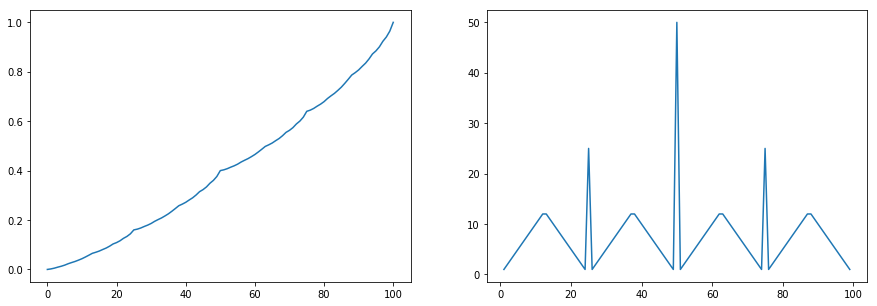

In [5]:
goal = 100
min_delta = 1e-12
q = []
v = np.zeros(goal+1) #101 states
v[-1] = 1 # the last state is with capital 100

for i in range(1, goal):
    q.append([0]*min(i,goal-i))
ph = 0.4

k = 1
while True:
    new_v = v.copy()
    delta = 0
    for i in range(0, goal-1):
        for j in range(min(i+1, goal-i-1)):
            # q[i][j] = ph*v[i-j] + (1-ph)*v[i+j+2]
            q[i][j] = (1-ph)*v[i-j] + ph*v[i+j+2] 
            new_v[i+1] = max(q[i])
            delta = max(delta, new_v[i+1]-v[i+1])
    if delta < min_delta:
        break
    else:
        v = new_v
        k += 1

stakes = []
for i in range(goal-1):
    stakes.append(np.argmax(np.round(q[i],5))+1) # to assemble figure4.3 on page 84

plt.figure(figsize=(15,5)) #width first
plt.subplot(1,2,1)
plt.plot(range(goal+1), v)

plt.subplot(1,2,2)
plt.plot(range(1, goal), stakes)